# **Zomato Customer Review Sentiment Analysis**

## **Objective**

To analyze customer reviews and identify sentiment trends (positive, negative, neutral) using Natural Language Processing (NLP) techniques.

## **1. Importing Libraries**

**Theory:**

We use the following libraries:
- `pandas`: For data manipulation.
- `TextBlob` or `VADER`: For sentiment analysis of textual reviews.
- `matplotlib.pyplot` and `seaborn`: For data visualization.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

## **2. Loading the Dataset**

**Theory:**

We load the dataset and inspect its structure to understand the available data. This helps identify any issues like missing values.

In [2]:
# Load the dataset
file_name = "zomato_reviews_data.csv"
df = pd.read_csv(file_name)

# Display the first few rows of the dataset
print("Dataset Overview:")
print(df.head())

# Check basic information about the dataset
print("\nDataset Information:")
df.info()

Dataset Overview:
  Review ID Customer Name                                        Review Text  \
0  REV00001    Customer_1  The delivery was on time, but the packaging wa...   
1  REV00002    Customer_2  Terrible experience! Food was cold and deliver...   
2  REV00003    Customer_3  Terrible experience! Food was cold and deliver...   
3  REV00004    Customer_4                 Loved the pizza! Will order again.   
4  REV00005    Customer_5  Not satisfied with the delivery time. Food was...   

   Rating  Order ID Restaurant Name  
0       1  ORD00063        Domino's  
1       2  ORD00071     Burger King  
2       5  ORD00098        Domino's  
3       3  ORD00070      McDonald's  
4       1  ORD00069       Pizza Hut  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review ID        1000 non-null   object
 1   Custom

## **3. Data Cleaning**

**Theory:**

Cleaning involves handling null values and ensuring consistent data formats.

In [3]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop rows with missing Review Text
df.dropna(subset=["Review Text"], inplace=True)

# Display cleaned data
print("\nCleaned Data Sample:")
print(df.head())


Missing Values:
Review ID          0
Customer Name      0
Review Text        0
Rating             0
Order ID           0
Restaurant Name    0
dtype: int64

Cleaned Data Sample:
  Review ID Customer Name                                        Review Text  \
0  REV00001    Customer_1  The delivery was on time, but the packaging wa...   
1  REV00002    Customer_2  Terrible experience! Food was cold and deliver...   
2  REV00003    Customer_3  Terrible experience! Food was cold and deliver...   
3  REV00004    Customer_4                 Loved the pizza! Will order again.   
4  REV00005    Customer_5  Not satisfied with the delivery time. Food was...   

   Rating  Order ID Restaurant Name  
0       1  ORD00063        Domino's  
1       2  ORD00071     Burger King  
2       5  ORD00098        Domino's  
3       3  ORD00070      McDonald's  
4       1  ORD00069       Pizza Hut  


## **4. Sentiment Analysis**

### **4.1 Adding Sentiment Scores**

**Theory:**

Using `TextBlob`, we calculate:
- **Polarity**: Ranges from -1 (negative) to +1 (positive).
- **Sentiment Category**: Derived from polarity (positive, neutral, negative).

In [4]:
# Function to calculate sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Add polarity column
df['Sentiment Polarity'] = df['Review Text'].apply(get_sentiment)

# Categorize sentiment
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment Category'] = df['Sentiment Polarity'].apply(categorize_sentiment)

# Display updated dataset
print("\nSentiment Analysis Sample:")
print(df[['Review Text', 'Sentiment Polarity', 'Sentiment Category']].head())


Sentiment Analysis Sample:
                                         Review Text  Sentiment Polarity  \
0  The delivery was on time, but the packaging wa...           -0.400000   
1  Terrible experience! Food was cold and deliver...           -0.633333   
2  Terrible experience! Food was cold and deliver...           -0.633333   
3                 Loved the pizza! Will order again.            0.875000   
4  Not satisfied with the delivery time. Food was...            0.125000   

  Sentiment Category  
0           Negative  
1           Negative  
2           Negative  
3           Positive  
4           Positive  


### **4.2 Sentiment Distribution**

**Theory:**

Visualizing sentiment distribution helps understand overall customer satisfaction trends.

<ipython-input-5-e6bf3d33f612>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment Category', data=df, palette='coolwarm')


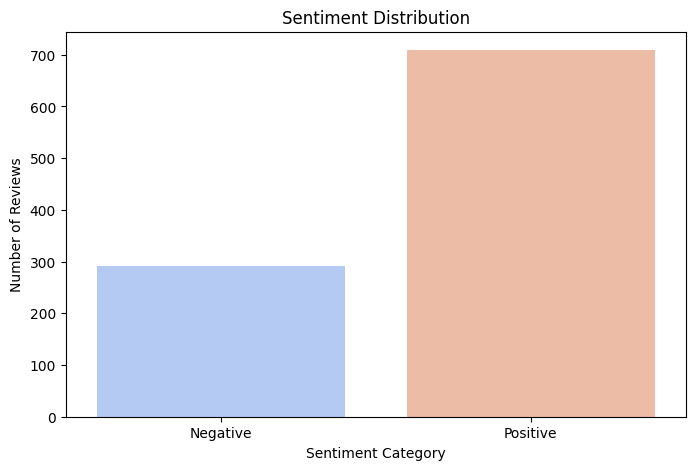

In [5]:
# Plot the sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment Category', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()

## **5. Exploratory Data Analysis (EDA)**

### **5.1 Sentiment by Rating**

**Theory:**

Analyzing sentiment polarity for each rating helps validate sentiment analysis accuracy.

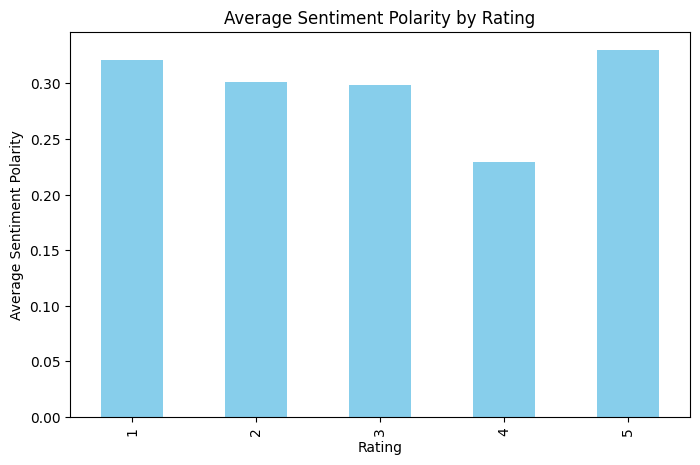

In [6]:
# Average sentiment polarity by rating
avg_sentiment_by_rating = df.groupby('Rating')['Sentiment Polarity'].mean()

# Plot the results
plt.figure(figsize=(8, 5))
avg_sentiment_by_rating.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment Polarity by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment Polarity')
plt.show()

### **5.2 Sentiment Trends by Restaurant**

**Theory:**

Identifying sentiment trends by restaurant helps understand how different brands are perceived.

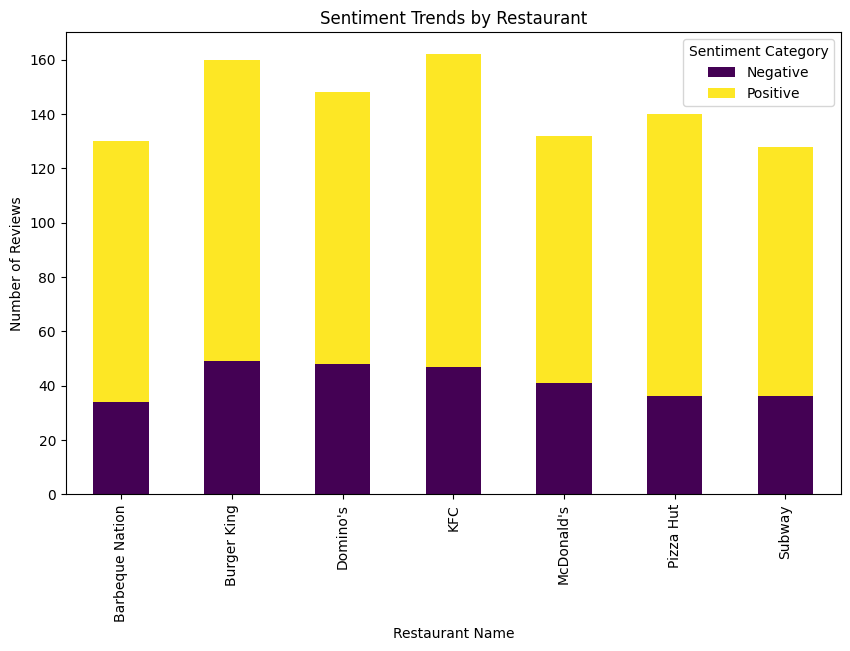

In [7]:
# Count sentiment by restaurant
sentiment_by_restaurant = df.groupby(['Restaurant Name', 'Sentiment Category']).size().unstack()

# Plot sentiment trends for restaurants
sentiment_by_restaurant.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Sentiment Trends by Restaurant')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Reviews')
plt.show()

## **6. Generating Insights**

**Theory:**

Summarize key insights, such as top-performing restaurants and areas of improvement.

In [8]:
# Key metrics
top_positive_restaurant = df[df['Sentiment Category'] == 'Positive']['Restaurant Name'].value_counts().idxmax()
top_negative_restaurant = df[df['Sentiment Category'] == 'Negative']['Restaurant Name'].value_counts().idxmax()

print(f"Restaurant with Most Positive Reviews: {top_positive_restaurant}")
print(f"Restaurant with Most Negative Reviews: {top_negative_restaurant}")

Restaurant with Most Positive Reviews: KFC
Restaurant with Most Negative Reviews: Burger King


## **7. Saving Processed Data**

**Theory:**

Save the dataset with additional sentiment columns for future analysis.

In [9]:
# Save the processed dataset
processed_file_name = "processed_zomato_reviews_data.csv"
df.to_csv(processed_file_name, index=False)
print(f"Processed data saved as {processed_file_name}")

Processed data saved as processed_zomato_reviews_data.csv
